<a href="https://colab.research.google.com/github/vinayakgautam368/Memes-vs-Notes/blob/master/Memes_vs_Notes(Numpy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import sklearn
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
directory="drive/My Drive/memesnotes/Stage_2"
CATEGORIES=["Memes","Notes"]
data=[]
size=64
for category in CATEGORIES:
  path=os.path.join(directory,category)
  
  label=CATEGORIES.index(category)
  for img in os.listdir(path):
    
    try:
      img_arr=cv2.imread(os.path.join(path,img))
      img_arr=cv2.resize(img_arr,(size,size))
      data.append([img_arr,label])
    except Exception as e:
      pass




    

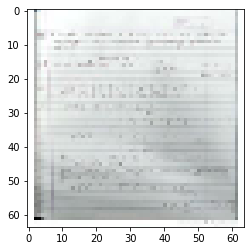

In [ ]:
random.shuffle(data)
X = []
Y = []
for features, labels in data:
    X.append(features)
    Y.append(labels)
X = np.array(X)
Y = np.array(Y)



plt.imshow(data[0][0])
plt.show()

In [ ]:
print(X.shape, Y.shape)

X_tra, X_te, Y_tra, Y_te = train_test_split(X, Y, test_size=0.22)
X_tra,X_val,Y_tra,Y_val=train_test_split(X_tra,Y_tra,test_size=0.08)
# print(X_tra.shape, Y_tra.shape, X_te.shape, Y_te.shape)

X_train = X_tra.reshape(X_tra.shape[0], -1).T
X_test = X_te.reshape(X_te.shape[0], -1).T
Y_train = Y_tra.reshape((1, Y_tra.shape[0]))
Y_test = Y_te.reshape((1, Y_te.shape[0]))
X_Val=X_val.reshape(X_val.shape[0],-1).T
Y_Val=Y_val.reshape((1,Y_val.shape[0]))

X_train = X_train / 255
X_test = X_test / 255
X_Val=X_Val/255

print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of Y_test", Y_test.shape)
print("shape of X_Val",X_Val.shape)
print("shape of Y_Val",Y_Val.shape)


(1600, 64, 64, 3) (1600,)
shape of X_train: (12288, 1148)
shape of Y_train: (1, 1148)
shape of X_test: (12288, 352)
shape of Y_test (1, 352)
shape of X_Val (12288, 100)
shape of Y_Val (1, 100)


In [ ]:

def initialize(layer):
    np.random.seed(3)
    parameters = {}
    L = len(layer)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer[l], layer[l - 1]) / np.sqrt(layer[l - 1]) # He initialization of parameters
        parameters['b' + str(l)] = np.zeros((layer[l], 1))

    return parameters


In [ ]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache



def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache


def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ


def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ



In [ ]:
# forward propagation
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    assert (Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache


In [ ]:

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    else:
        pass

    cache = (linear_cache, activation_cache)

    return A, cache


In [ ]:

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)],
                                             activation="relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation="sigmoid")
    caches.append(cache)

    
    return AL, caches



In [ ]:
def compute_cost(AL, Y):  # cost computataion
    m = Y.shape[1]

    cost = (-1 / m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))

    cost = np.squeeze(cost)
   

    return cost


In [ ]:

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)

   

    return dA_prev, dW, db


In [ ]:

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db



In [ ]:

def backward(AL, Y, caches):
    grads = {}
    L = len(caches)

    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L - 1]
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,
                                                                                                      current_cache,
                                                                                                      activation="sigmoid")

    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache,
                                                                    activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads


In [ ]:

def update_parameters(parameters, grads, learning_rate):  # update parameters
    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters


In [ ]:

def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    new = np.zeros((1, m))

    Y_pred, caches = L_model_forward(X, parameters)

    for i in range(0, Y_pred.shape[1]):
        if Y_pred[0, i] > 0.5:
            new[0, i] = 1
        else:
            new[0, i] = 0

    return new

In [53]:


layers = [12288,500,100,20,5,1]


def model(X, Y, x_valid,y_valid, layers_dims, learning_rate, num_iterations,
          print_cost=False):
    costs = []
    validation_costs=[]
    parameters = initialize(layers_dims)

    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        AL_val ,Al_caches=L_model_forward(x_valid,parameters)

        cost = compute_cost(AL, Y)
        valid_cost=compute_cost(AL_val,y_valid)

        grads = backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print("Training cost after iteration %i: %f" % (i, cost))
            print("Validation cost after iteration %i:%f"%(i,valid_cost))
            valid_predict=predict(x_valid,y_valid,parameters)

        if print_cost and i % 100 == 0:
            costs.append(cost)
            validation_costs.append(valid_cost)

    plt.plot(np.squeeze(costs))
    plt.plot(np.squeeze(validation_costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations ')
    plt.title("Training set/Validation Set ")
    plt.show()
    # print("Test Accuracy : {} %".format(100 - np.mean(np.abs(valid_pred - Y_val)) * 100))


    


    return parameters










Training cost after iteration 0: 0.720144
Validation cost after iteration 0:0.702210
Training cost after iteration 100: 0.373954
Validation cost after iteration 100:0.422477
Training cost after iteration 200: 0.255435
Validation cost after iteration 200:0.294487
Training cost after iteration 300: 0.177976
Validation cost after iteration 300:0.224294
Training cost after iteration 400: 0.128560
Validation cost after iteration 400:0.191758


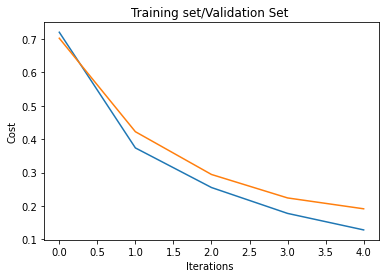

Train Accuracy : 97.64808362369338 %
Test Accuracy : 93.75 %
Validation Accuracy  : 93.0 %


In [55]:
# parameter=model1(X_Val,Y_Val,layers,learning_rate=0.0085,num_iterations=1000,print_cost=True)
parameters= model(X_train, Y_train,X_Val,Y_Val, layers, learning_rate=0.0085, num_iterations=500, print_cost=True)
#parameter=model(X_Val,Y_Val,layers,learning_rate=0.0085,num_iterations=1000,print_cost=True)
test_pred = predict(X_test, Y_test, parameters)

train_pred = predict(X_train, Y_train, parameters)





print("Train Accuracy : {} %".format(100 - np.mean(np.abs(train_pred - Y_train)) * 100))
print("Test Accuracy : {} %".format(100 - np.mean(np.abs(test_pred - Y_test)) * 100))



val_pred =predict(X_Val,Y_Val,parameters)
print("Validation Accuracy  : {} %".format(100 - np.mean(np.abs(val_pred - Y_Val)) * 100))









**CHECKING OF MODEL BY GIVING OWN IMAGE**




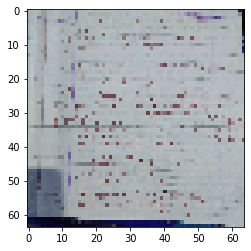

(12288, 1)


In [57]:




x="drive/My Drive/IMG_20200811_154426.jpg"
img=cv2.imread(x)
img=cv2.resize(img,(64,64))
plt.imshow(img)
plt.show()

c=np.array(img)
c=c.reshape(64*64*3,1)
print(c.shape)






In [58]:
al,caches=L_model_forward(c, parameters)

if al>0.5:
  print("IT IS A NOTE")
else:
  print("IT IS A MEME")  

IT IS A NOTE
